<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Create visualizations using Matplotib, Seaborn and Folium** 

Estimated time needed: **40** minutes

In this assignment, you will have the opportunity to demonstrate the skills you have acquired in creating visualizations using *Matplotlib, Seaborn, Folium*.
<br>
<br>
<span style="color:red">After each task you will be required to save your plots as an image or screenshot using the filenames specified.  You will be uploading these images during your final project submission so they can be evaluated by your peers. </span>


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data Description">Data Description</a></li>
        </ol>
    </li>
    <li><a href="#Importing Data">Importing data</a></li>
    <li><a href="#Creating Visualizations for Data Analysis">Creating Visualizations for Data Analysis</a></li>
</ol>


# Objectives

After completing this lab you will be able to:

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# %pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [2]:
%pip install seaborn
%pip install folium

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

<ipython-input-3-107089beb3f3>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


#### For your convenience, we have already written code to import the data below.


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [8]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


Text(0, 0.5, 'Number of Automobiles')

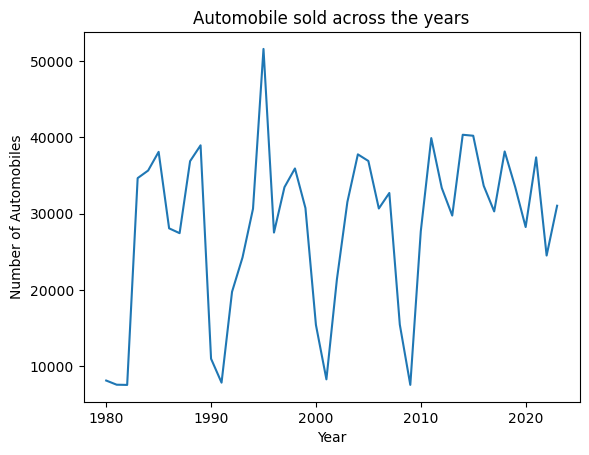

In [7]:
temp = df.groupby("Year")["Automobile_Sales"].sum()
temp.plot(x="Year", y="Automobile_Sales", kind="line")
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")

### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 


Text(0, 0.5, 'Number of Automobiles')

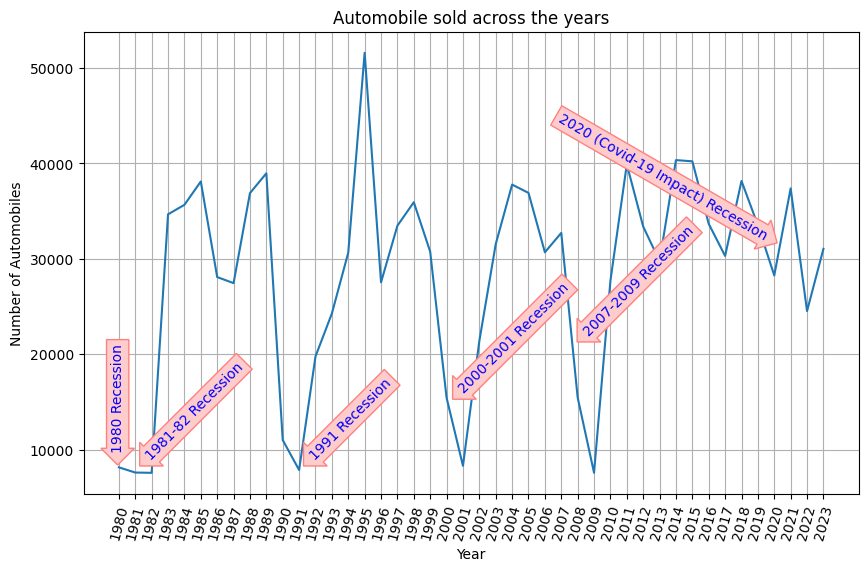

In [9]:
plt.figure(figsize=(10, 6))
temp.plot(x="Year", y="Automobile_Sales", kind="line")
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
years = [1979.5, 1981.5, 1991.5, 2000.6, 2008.2, 2006.7]
texts = ["1980 Recession", 
         "1981-82 Recession", 
         "1991 Recession", 
         "2000-2001 Recession", 
         "2007-2009 Recession", 
         "2020 (Covid-19 Impact) Recession"]
positions = [(i+1)*(10**4) for i in range(len(years))]
positions = [10000, 9000, 9000, 16000, 22000, 32000]
for year, text, pos in zip(years, texts, positions):
    if year==1979.5:
        plt.text(year, pos, text, rotation=90, color="blue",
             bbox=dict(boxstyle="larrow",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8)
                      )
            )
        continue
    if year==2006.7:
        plt.text(year, pos, text, rotation=-30, color="blue",
             bbox=dict(boxstyle="rarrow",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8)
                      )
            )
        continue
    plt.text(year, pos, text, rotation=45, color="blue",
             bbox=dict(boxstyle="larrow",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8)
                      )
            )
plt.grid()
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")

<span style="color:red">
Save this plot as "Line_Plot_1.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


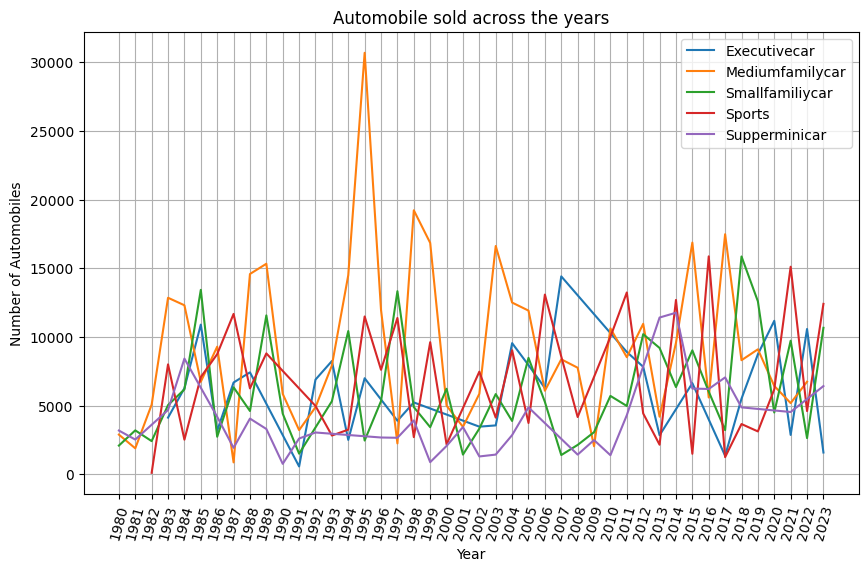

In [10]:
plt.figure(figsize=(10, 6))
temp = df.groupby(["Year", "Vehicle_Type"])[["Automobile_Sales"]].sum().reset_index()
temp.set_index("Year", inplace=True)
temp = temp.groupby(["Vehicle_Type"])["Automobile_Sales"]
temp.plot(kind="line")
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
plt.grid()
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")
plt.legend()

#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


Generally, sales volumes tend to decrease during various recessionary periods. However, certain vehicle types experience more pronounced declines than others. It is challenging to precisely elucidate the differences between these vehicle types.

<span style="color:red">
Save this plot as "Line_Plot_2.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


Text(0.5, 1.0, 'Average Automobile Sales during Recession and Non-Recession')

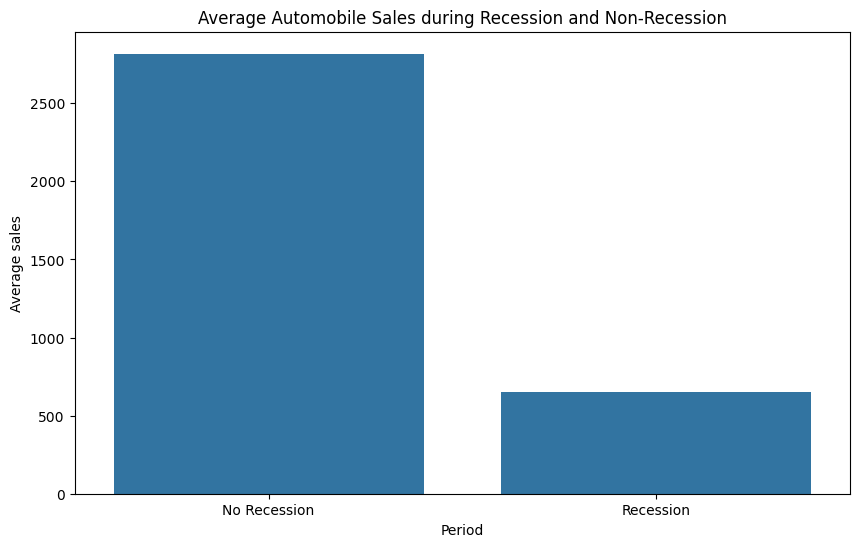

In [11]:
temp=df.groupby(["Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No Recession", 1:"Recession"})
# temp
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Recession", y="Automobile_Sales")
plt.xlabel('Period')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization


Text(0.5, 1.0, 'Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

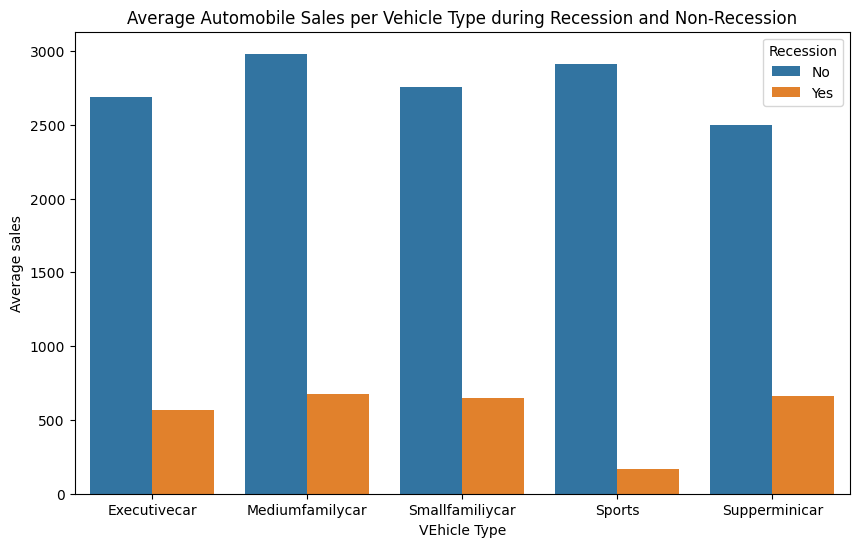

In [12]:
temp=df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No", 1:"Yes"})
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.xlabel('VEhicle Type')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession')


### From the above chart what insights have you gained on the overall sales of automobiles during recession? <br> Type your answer below:-


During Recession period the sales in average are great than No recession period. The Volume sales are slightly different between them but meddium family cars are the most sold in this period, in contrast the supperminni cars are less sold. of No Recession period are greater. In other hand during no recession period the majority types of vehicles have similar volume sales but Spórts type has "considerible" less volume sales than the others in this case. (approx. less than 50%)





From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.However, the most affected type of vehicle is executivecar and sports


<span style="color:red">
Save this plot as "Bar_Chart.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


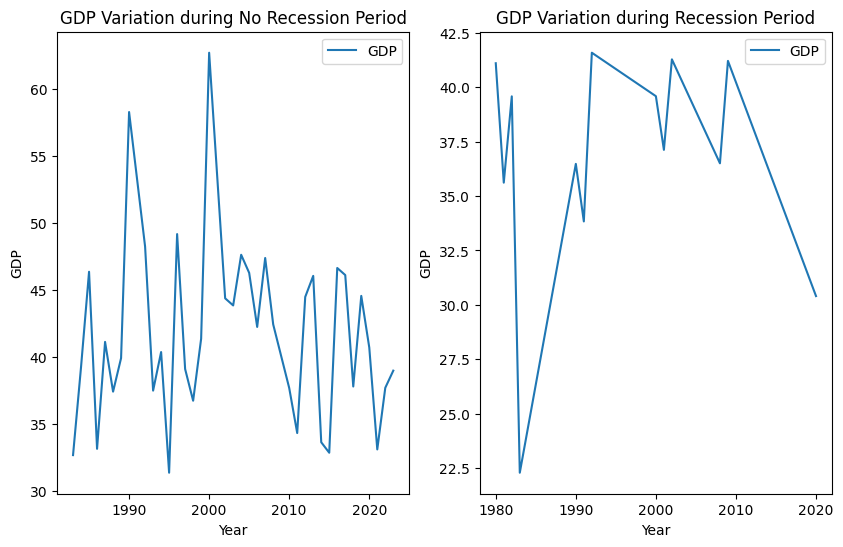

In [13]:
temp = df.groupby(["Recession","Year"])["GDP"].mean().reset_index()
no = temp[temp["Recession"] == 0]
yes = temp[temp["Recession"] == 1]

fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

no.plot(x="Year", y="GDP", kind="line", ax=ax0)
ax0.set_title('GDP Variation during No Recession Period')
ax0.set_ylabel('GDP')

yes.plot(x="Year", y="GDP", kind="line", ax=ax1)
ax1.set_title('GDP Variation during Recession Period')
ax1.set_ylabel('GDP')

plt.show()

### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>
<span style="color:red">
Save this plot as "Subplot.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


<ipython-input-14-363bb3dd41bb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp["Month"] = temp["Month"].replace(dict(zip(months, range(0,len(months)))))


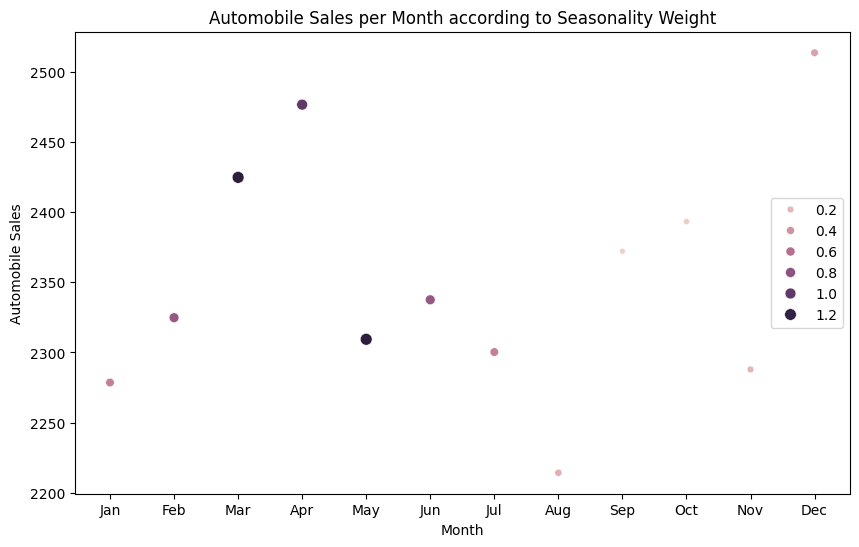

In [14]:
temp = df.copy()
months=temp["Month"].unique().tolist()
# display(months)
temp["Month"] = temp["Month"].replace(dict(zip(months, range(0,len(months)))))
temp = temp.groupby("Month")[["Automobile_Sales", "Seasonality_Weight"]].mean().reset_index()
# display(temp)
plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(0,len(months)),labels=months)
sns.scatterplot(data=temp,
                x='Month',
                y='Automobile_Sales',
                hue="Seasonality_Weight",
                size="Seasonality_Weight",  # pass in weights 
                #sizes=(20, 1500)
               )
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales per Month according to Seasonality Weight")
plt.legend(loc="right")

### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>
<span style="color:red">
Save this plot as "Bubble.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


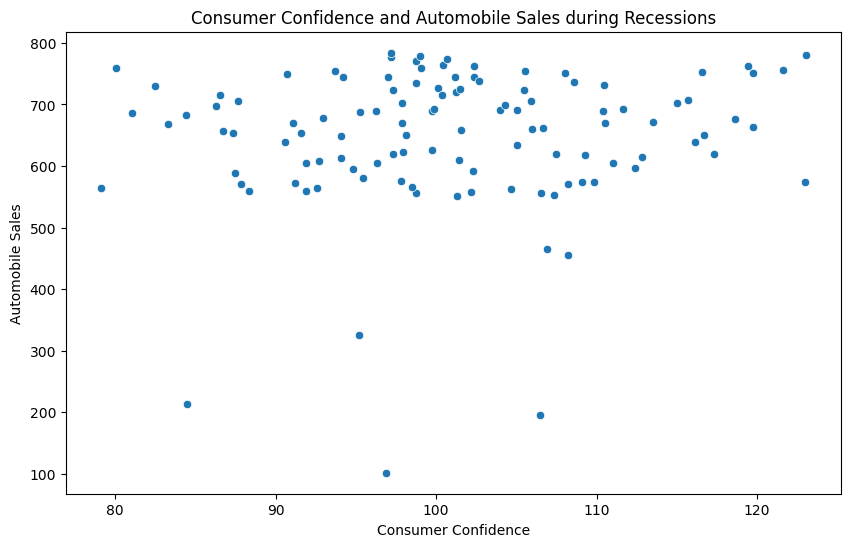

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"]==1], x='Consumer_Confidence', y='Automobile_Sales')
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


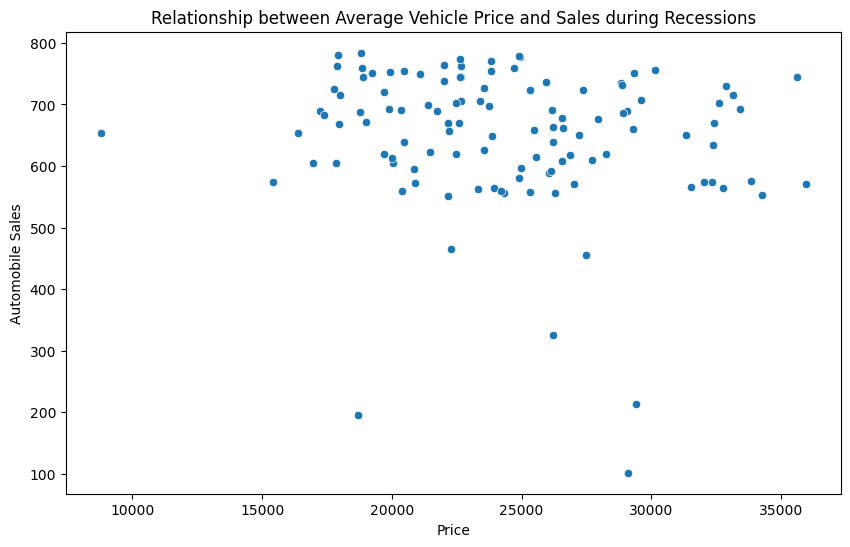

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"]==1], x='Price', y='Automobile_Sales')
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.show()

### Inference
There is not much relation!<br><br>
<span style="color:red">
Save this plot as "Scatter.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


No Recession    0.790129
Recession       0.209871
Name: Advertising_Expenditure, dtype: float64

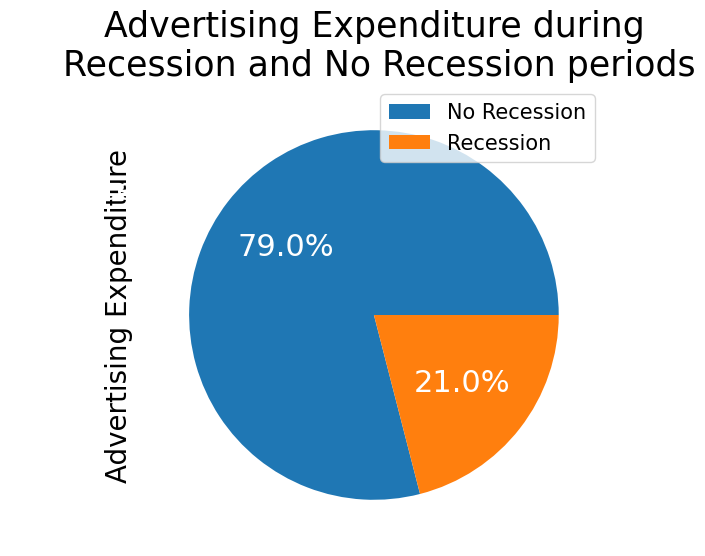

In [28]:
temp=df.groupby("Recession")["Advertising_Expenditure"].sum()/df["Advertising_Expenditure"].sum()
temp.index=["No Recession", "Recession"]
display(temp)
temp.plot(kind="pie",
          figsize=(10, 6),
          y="Advertising_Expenditure",
          #ylabel=dict(ylabel="Advertising Expenditure",fontsize=100),
          x="Recession",
          #title="HOLA",
          autopct='%1.1f%%',
          textprops={'color':"w", "size":22},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession and No Recession periods",fontsize=25)
plt.legend(fontsize=15)
plt.show()

#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-


temp=df[df["Recession"]==1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
temp.plot(kind="pie",
          figsize=(12, 8),
          autopct='%1.1f%%',
          y="Advertising_Expenditure",
          textprops={'color':"w", "size":20},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession period per Vehicle type",fontsize=25)
plt.legend(title="Vehicle Type", loc="best", fontsize=11)
plt.show()

<details><summary>Inference</summary>
It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!<br><br></details>


<span style="color:red">
Save this plot as "Pie_1.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


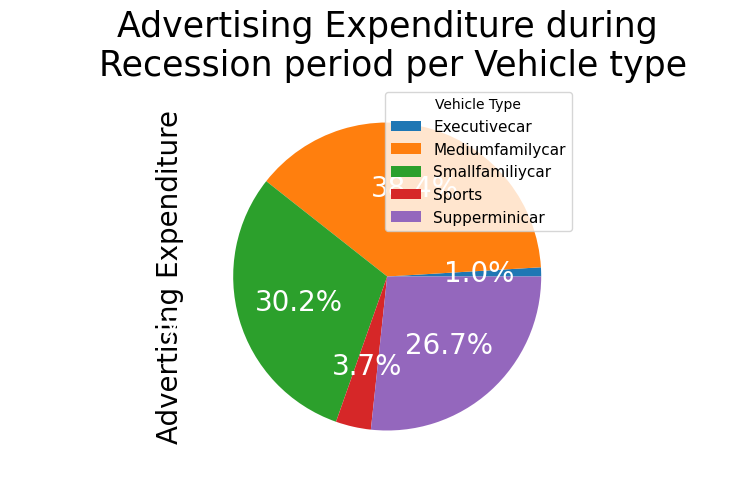

In [29]:
temp=df[df["Recession"]==1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
temp.plot(kind="pie",
          figsize=(10, 5),
          autopct='%1.1f%%',
          y="Advertising_Expenditure",
          textprops={'color':"w", "size":20},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession period per Vehicle type",fontsize=25)
plt.legend(title="Vehicle Type", loc="best", fontsize=11)
plt.show()

### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>
<span style="color:red">
Save this plot as "Pie_2.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


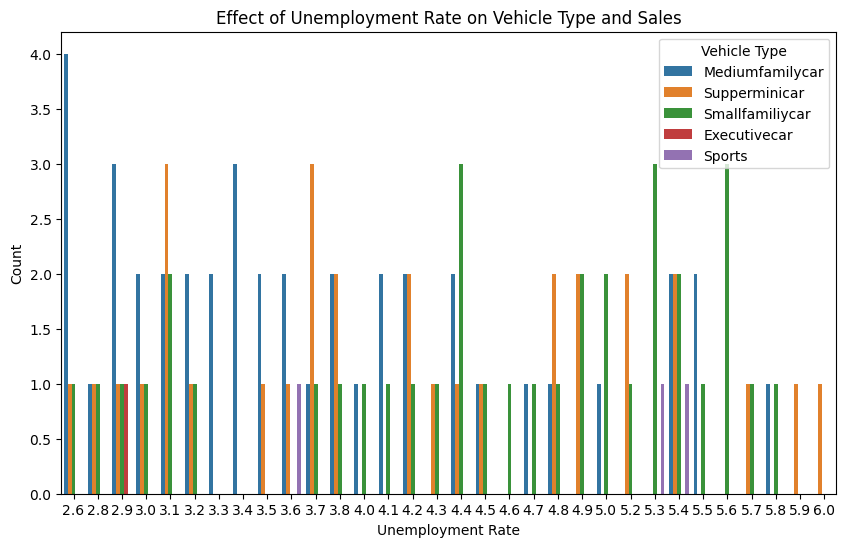

In [19]:
#df.columns
plt.figure(figsize=(10,6))
sns.countplot(data=df[df["Recession"]==1], x="unemployment_rate", hue="Vehicle_Type")
plt.xlabel("Unemployment Rate")
plt.ylabel("Count")
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.legend(loc="upper right", title="Vehicle Type")

#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br> Type your answer below:-


For recession periods the supperminicar sales tends to be more high when the unemployment rate is low, in other hand the smallfamilycar has an opposite behavior. Finally the mediumminicar tends to be more volume sales for low unemployment rate then the supperminicar.

<details><summary>Inference</summary>
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar<br><br>
</details>


<span style="color:red">
Save this plot as "line_plot_3.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [24]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


In [25]:
temp=pd.read_json(filename)
for row in temp["features"]:
    print(row["id"], row["properties"]["name"])

AL Alabama
AK Alaska
AZ Arizona
AR Arkansas
CA California
CO Colorado
CT Connecticut
DE Delaware
FL Florida
GA Georgia
HI Hawaii
ID Idaho
IL Illinois
IN Indiana
IA Iowa
KS Kansas
KY Kentucky
LA Louisiana
ME Maine
MD Maryland
MA Massachusetts
MI Michigan
MN Minnesota
MS Mississippi
MO Missouri
MT Montana
NE Nebraska
NV Nevada
NH New Hampshire
NJ New Jersey
NM New Mexico
NY New York
NC North Carolina
ND North Dakota
OH Ohio
OK Oklahoma
OR Oregon
PA Pennsylvania
RI Rhode Island
SC South Carolina
SD South Dakota
TN Tennessee
TX Texas
UT Utah
VT Vermont
VA Virginia
WA Washington
WV West Virginia
WI Wisconsin
WY Wyoming


In [26]:
df["City"].unique()

array(['Georgia', 'New York', 'Illinois', 'California'], dtype=object)

In [27]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1

# Congratulations! You have completed the lab


## Authors


[Dr. Pooja](author_link)


``` toggle ## Change Log
```


<!---|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
2024-01-05|0.2.1|Sowmyaa Gurusamy|Updated the lab instructions|
|2023-06-17|0.2|Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|-->


Copyright © 2023 IBM Corporation. All rights reserved.
